In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Step 1: Collecting Data

In [2]:
dataset = pd.read_csv('SUV_data.csv')

In [3]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


# Step 2: Analysing Data

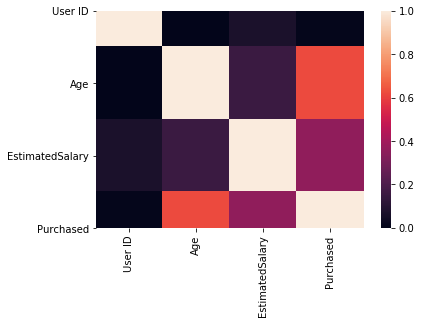

In [4]:
sns.heatmap(dataset.corr())

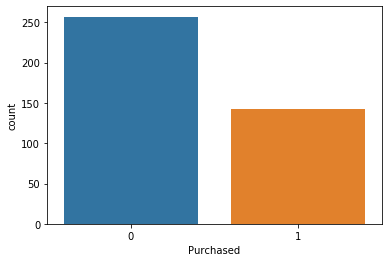

In [5]:
## How many employees bought SUV
sns.countplot(x='Purchased', data=dataset)

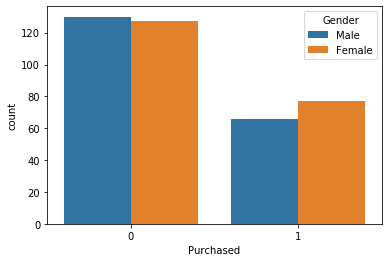

In [6]:
## Trying to visualize the contribution of 'Gender' towards the purchase.
sns.countplot(x='Purchased', hue='Gender', data=dataset)

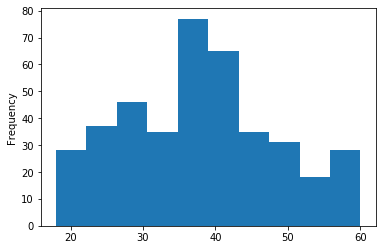

In [7]:
## Age may have an effect on the overall output.
dataset['Age'].plot.hist()

In [8]:
## To check whether there is any null value
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


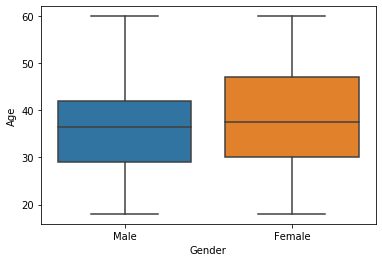

In [9]:
## Boxplot from seaborn
sns.boxplot(x='Gender', y='Age', data=dataset)

# Step 3: Data Wrangling

In [10]:
## Basically we are given the 'User ID' as data. But we don't need that.
## So, say goodbye to 'User ID'. We are dropping it.
dataset.drop('User ID', axis=1, inplace=True)

In [11]:
dataset.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


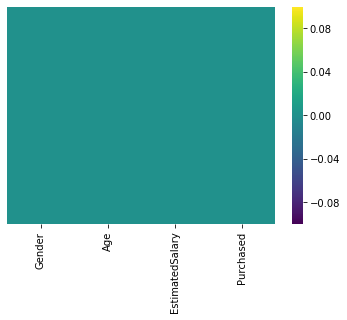

In [12]:
## Checking the heatmap
sns.heatmap(dataset.isnull(), yticklabels=False, cmap='viridis')

In [13]:
## Now we can see there isn't any null value. So cute


In [14]:
## We have another column 'Gender'. But that is in string form. What we can do, we can change
## that data into categorical 0, 1. As this column has categrical variation unlike age or salary.
## So we can divide the employees here as well, of course categorically.

In [15]:
## Using panda.get_dummies to convert the data into dummy variables.
pd.get_dummies(dataset['Gender'])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [16]:
## We can take only one column from here. Because we can see that, for every female(0, 1) value there is 
## a corresponding male (0, 1) value and they are opposite. (m = 1, f = 0 or vise versa)




In [17]:
## Dropping the first column from the dummy variables
gender = pd.get_dummies(dataset['Gender'], drop_first=True)
gender

## So we have male = 1 and female = 0

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [18]:
## Now we are going to put this column into the dataset, as another set of significant, usable data
dataset = pd.concat([dataset, gender], axis=1)

## And we are going to drop the 'Gender' column. 
dataset.drop('Gender', axis=1, inplace=True)

In [19]:
dataset.head(5)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


# Step 4: Train and Test

In [20]:
## Extracting independent variables
X = dataset.iloc[:, [0, 1, 3]].values
y = dataset.iloc[:, 2].values
len(dataset.index)

## iloc is used for interger based indexing for arrays. A function of "pandas"

400

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
## For training and testing data
## Using 50% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

# Feature Scaling

In [23]:
## Scale the input values for better performing. For that we use 'StandardScaler'
## Because is this dataset we have large numbers. If they are scaled, it becomes easier for
## the processes to run.

from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test - sc.transform(X_test)

array([[ 3.07574432e+01,  8.69993941e+04, -4.08329997e-02],
       [ 3.79785813e+01,  5.00004855e+04,  9.60768923e-01],
       [ 3.52706545e+01,  7.49997481e+04, -4.08329997e-02],
       [ 3.07574432e+01,  7.89996301e+04,  9.60768923e-01],
       [ 3.52706545e+01,  5.00004855e+04,  9.60768923e-01],
       [ 2.80495164e+01,  2.00013705e+04, -4.08329997e-02],
       [ 3.16600855e+01,  1.50015180e+04,  9.60768923e-01],
       [ 3.61732968e+01,  1.43997713e+05, -4.08329997e-02],
       [ 1.99257361e+01,  6.79999546e+04,  9.60768923e-01],
       [ 4.61023617e+01,  4.30006920e+04, -4.08329997e-02],
       [ 3.07574432e+01,  4.90005150e+04, -4.08329997e-02],
       [ 2.89521587e+01,  5.50003381e+04,  9.60768923e-01],
       [ 3.70759390e+01,  5.50003381e+04, -4.08329997e-02],
       [ 3.88812236e+01,  7.69996891e+04, -4.08329997e-02],
       [ 2.17310206e+01,  8.59994236e+04, -4.08329997e-02],
       [ 3.25627277e+01,  1.16998509e+05,  9.60768923e-01],
       [ 3.70759390e+01,  7.69996891e+04

In [25]:
## For logistic regression
from sklearn.linear_model import LogisticRegression

In [26]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
## Based on the fit after training, the set of predicted values are stored for further testing
y_predicted = classifier.predict(X_test)

# Step 5: Accuracy check

In [28]:
## To check the accuracy we import 'accuracy_score'
from sklearn.metrics import accuracy_score

## We can have another way of visualizing the success using 'Confusion Matrix'
## Or even misclassification rate.


In [29]:
accuracy_score(y_test, y_predicted)* 100

38.5

In [30]:
## I have checked. Gender does not affect the result.